In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt


diabetes = pd.read_csv("diabetes.csv")

In [3]:
#Wyznaczenie zmiennych
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
Unique values: 15


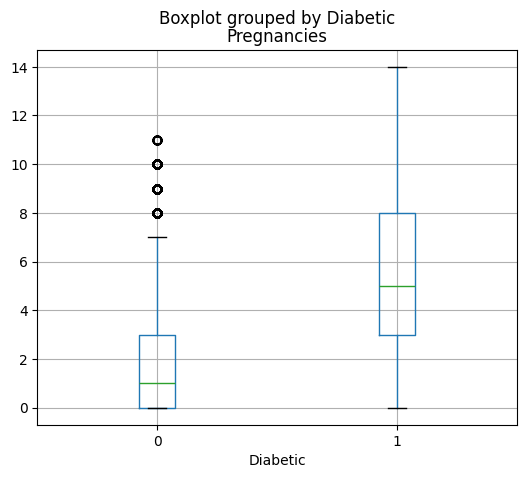

Unique values: 149


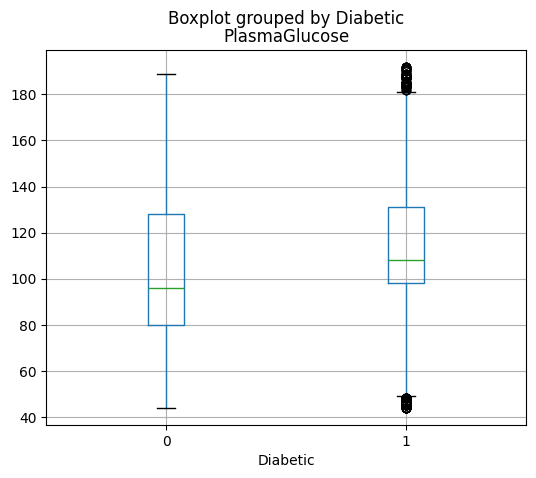

Unique values: 90


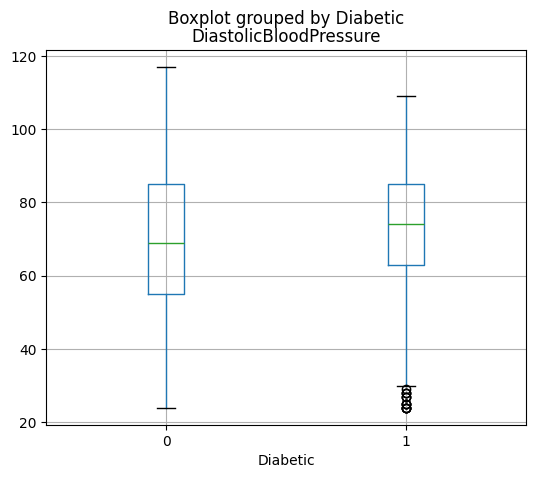

Unique values: 69


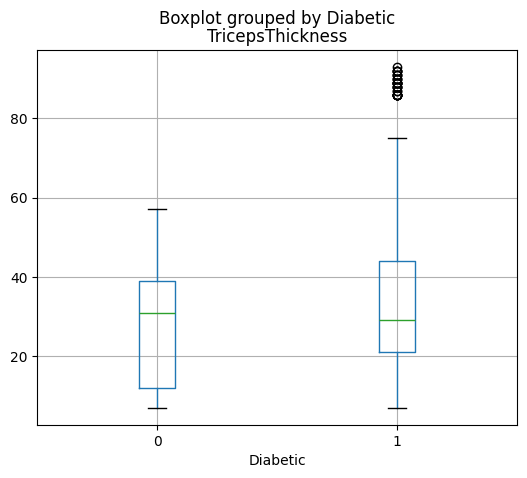

Unique values: 663


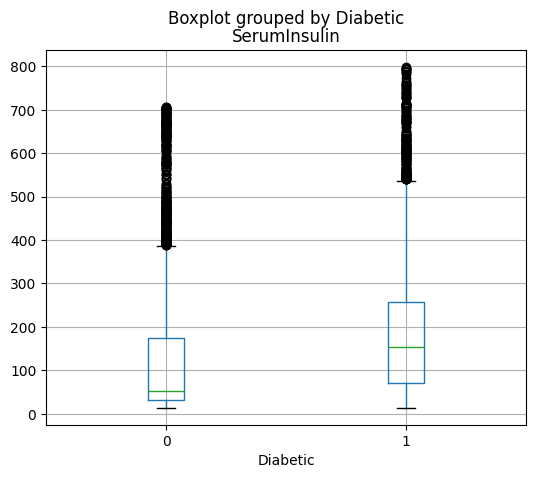

Unique values: 15000


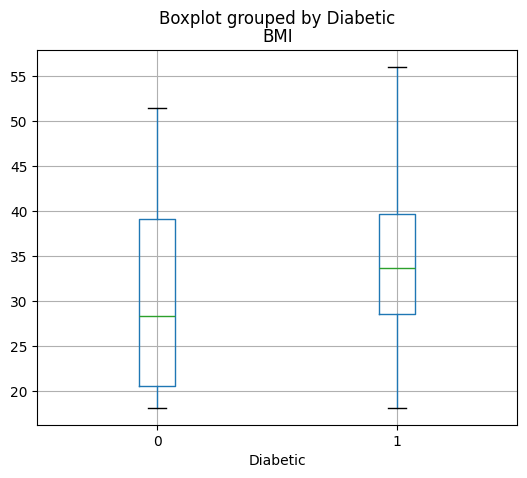

Unique values: 14999


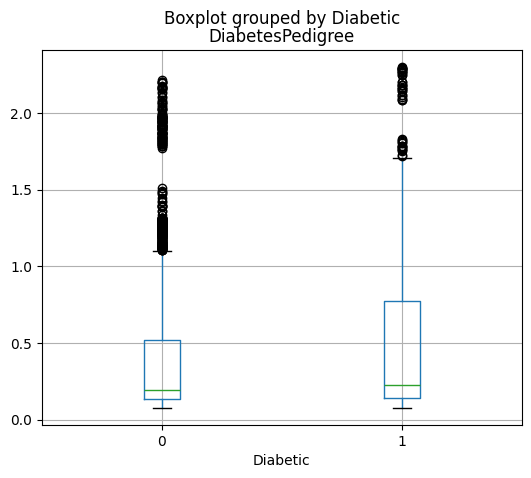

Unique values: 56


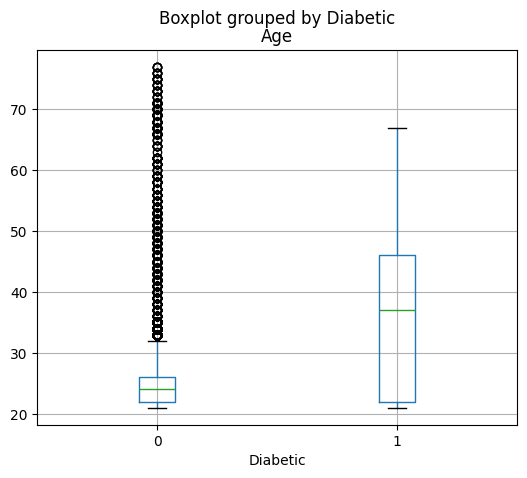

In [4]:
pd.Series(y).value_counts(normalize = True)
diabetes.info()

#Wizualizacja boxplot
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

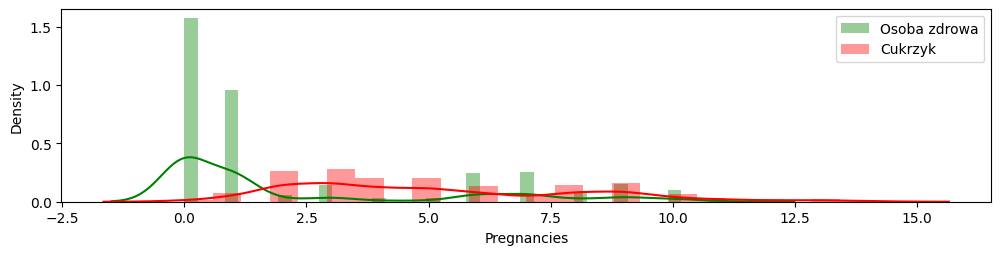

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

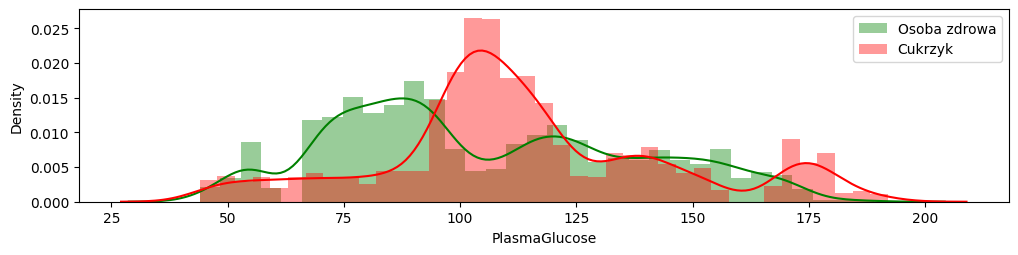

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

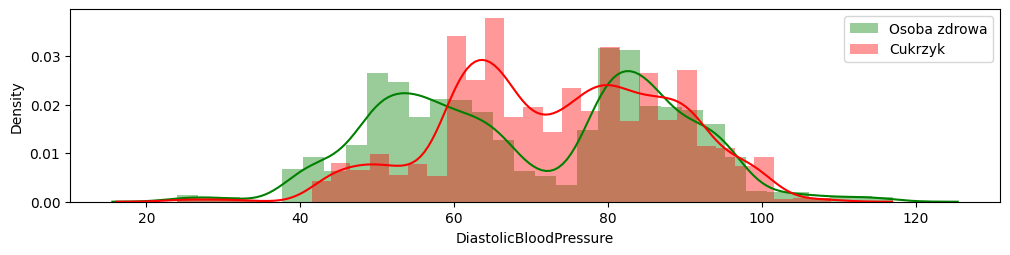

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

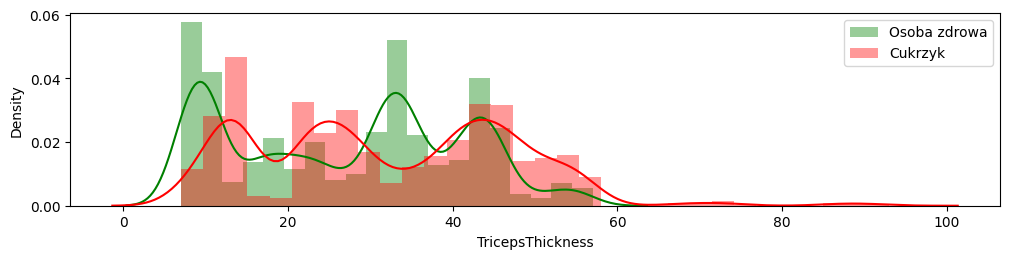

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

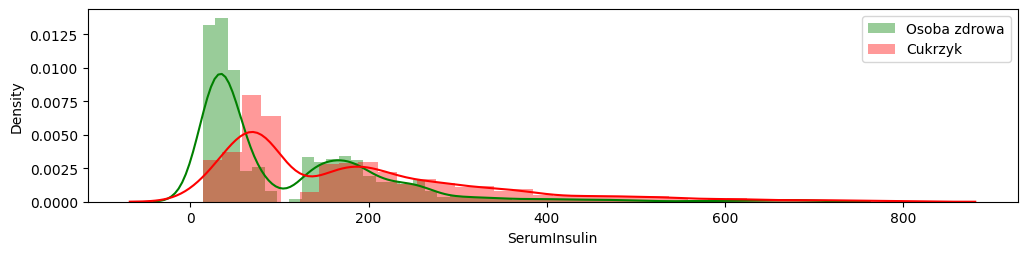

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

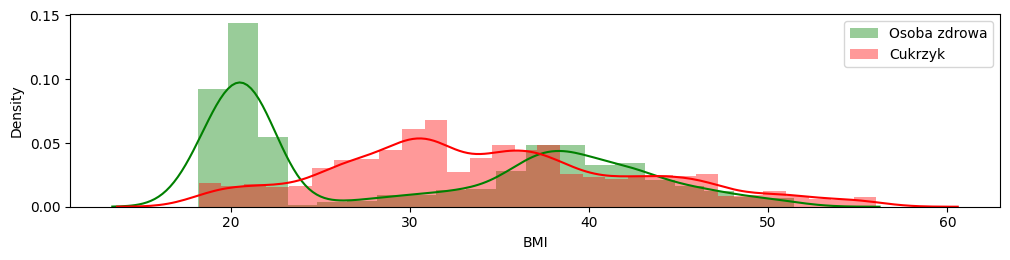

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

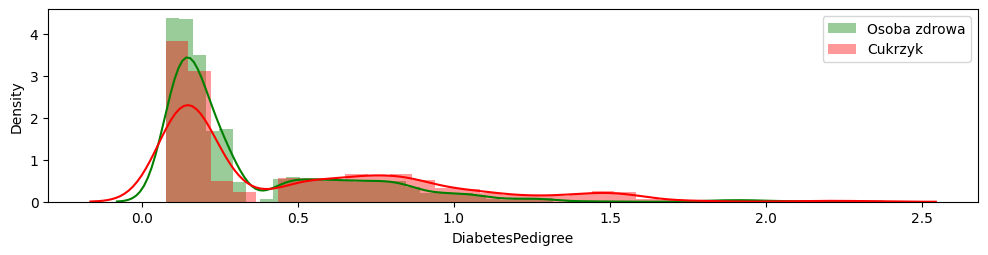

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\1210553274.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

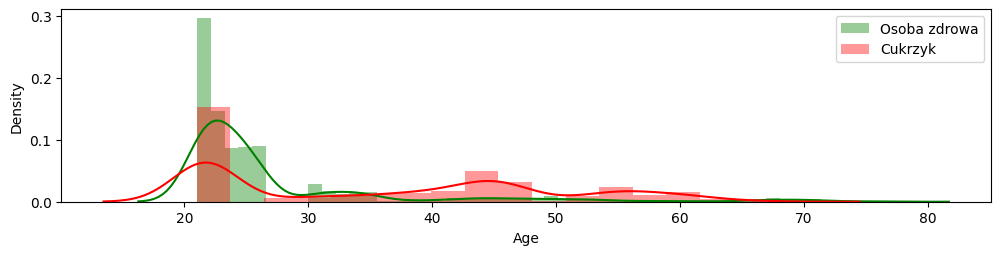

In [5]:
#Wizualizacja histogram
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

In [6]:
#Korelacja dla zmiennej kategorycznej - Point-biserial correlation coefficient
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [7]:
#Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)       #stratify przypisuje przybliżony ten sam procent do próbek
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))


Treningowe obserwacje: 10500
Testowe obserwacje: 4500


Utworzenie modelu regresji i standaryzacja X

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Wizualizacja klasyfikatora

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\3056952232.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


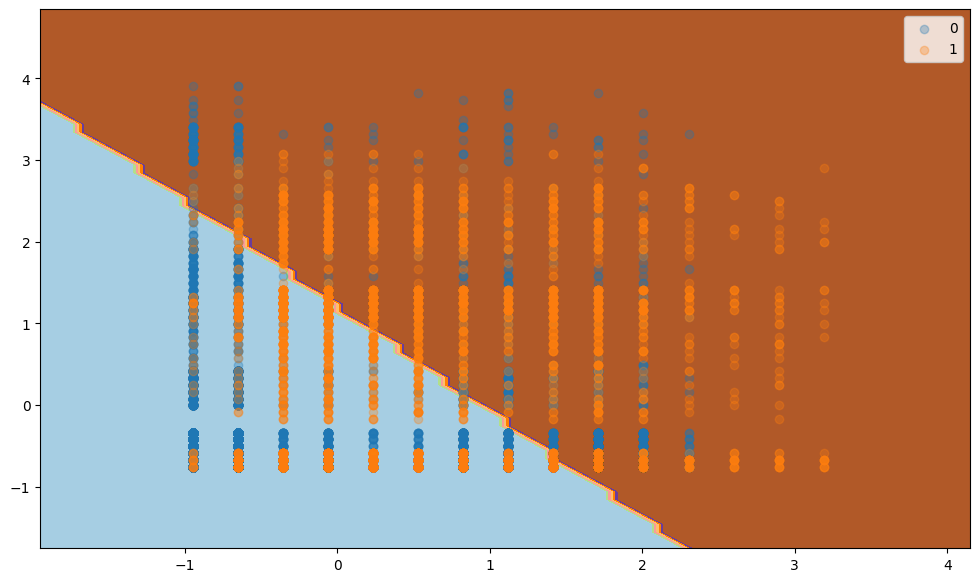

In [9]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

Predykcja

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


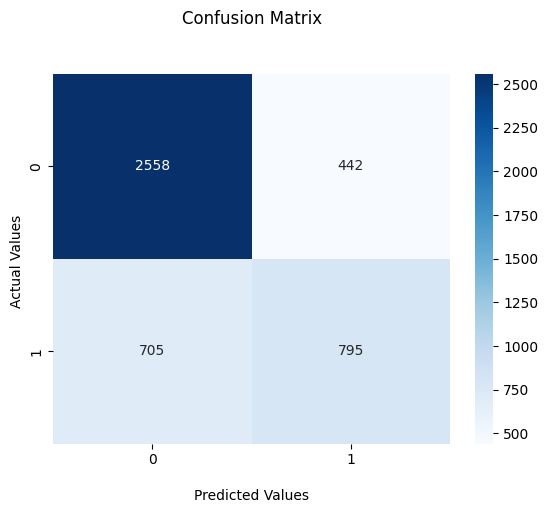

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



In [10]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Macierz omyłek
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

Krzywa ROC

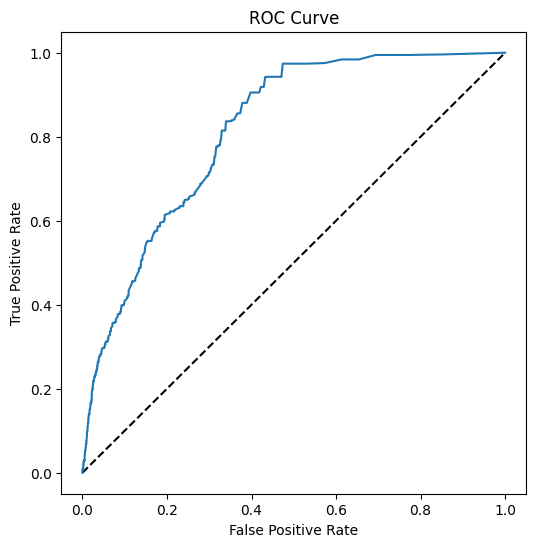

AUC: 0.8164931111111111


In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

Funkcja obliczająca metryki modeli

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



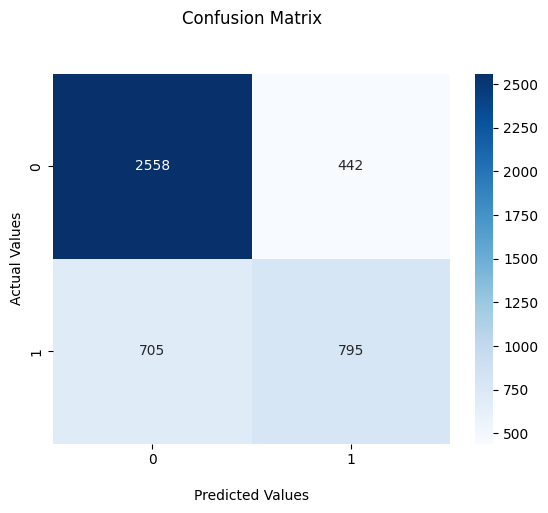

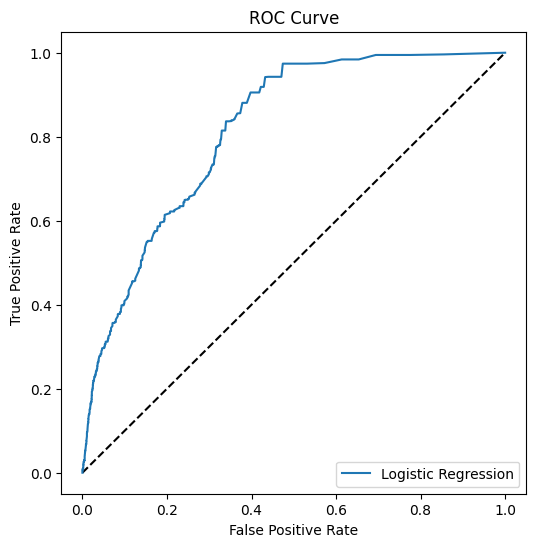

C:\Users\kkleps\AppData\Local\Temp\ipykernel_52076\3754016027.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [12]:
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe

    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    # Metryki klasyfikacji
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

    # ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, _ = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Liczenie metryk
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:, 1])

    # Zamiast .append(), użyj concat:
    new_row = pd.DataFrame([{'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric}])
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    return metrics_dataframe

# Wywołanie funkcji
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)


Wizualizacja regularyzacji

In [ ]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)  # wycisza ostrzeżenia o niekonwergencji

# Ustawienia testowanych wartości
penalties = ['l1', 'l2', 'elasticnet']  # różne typy regularyzacji
C_values = [0.01, 0.1, 1, 10]           # różna siła regularyzacji (mniejsze C = silniejsza regularyzacja)
l1_ratios = [0.5]                       # proporcja L1 do L2, tylko dla elasticnet

results = []  # lista na wyniki

# Pętla po typach regularyzacji
for penalty in penalties:
    for C in C_values:
        # Specjalna obsługa dla elasticnet, bo wymaga dodatkowego parametru l1_ratio
        if penalty == 'elasticnet':
            for l1_ratio in l1_ratios:
                # Tworzenie modelu z elasticnet
                model = LogisticRegression(
                    penalty=penalty,
                    C=C,
                    solver='saga',      # tylko 'saga' obsługuje elasticnet
                    l1_ratio=l1_ratio,
                    max_iter=10000      # liczba iteracji
                )
                model.fit(X_train_standardized, y_train)  # trenowanie modelu

                # Predykcja i obliczenie F1
                y_train_pred = model.predict(X_train_standardized)
                y_test_pred = model.predict(X_test_standardized)
                f1_train = f1_score(y_train, y_train_pred)
                f1_test = f1_score(y_test, y_test_pred)

                # Wydruk informacji i wykres
                print(f'\nPenalty: {penalty}, C: {C}, l1_ratio: {l1_ratio}')
                plot_classification_surface(X_train_standardized, y_train, model)
                print(f'F1 score (Train): {f1_train:.4f}, F1 score (Test): {f1_test:.4f}')

                # Zapisanie wyników
                results.append({
                    'penalty': penalty,
                    'C': C,
                    'l1_ratio': l1_ratio,
                    'F1_train': f1_train,
                    'F1_test': f1_test
                })
        else:
            # Model dla l1 i l2 
            model = LogisticRegression(
                penalty=penalty,
                C=C,
                solver='liblinear' if penalty == 'l1' else 'lbfgs',  # odpowiedni solver do typu
                max_iter=10000
            )
            model.fit(X_train_standardized, y_train)

            # Predykcja i F1
            y_train_pred = model.predict(X_train_standardized)
            y_test_pred = model.predict(X_test_standardized)
            f1_train = f1_score(y_train, y_train_pred)
            f1_test = f1_score(y_test, y_test_pred)

            # Wydruk i wykres
            print(f'\nPenalty: {penalty}, C: {C}')
            plot_classification_surface(X_train_standardized, y_train, model)
            print(f'F1 score (Train): {f1_train:.4f}, F1 score (Test): {f1_test:.4f}')

            # Zapisz wynik
            results.append({
                'penalty': penalty,
                'C': C,
                'l1_ratio': None,
                'F1_train': f1_train,
                'F1_test': f1_test
            })

# Przekształcenie wyników w tabelę
results_df = pd.DataFrame(results)

# Posortowanie według F1 na zbiorze testowym
results_df_sorted = results_df.sort_values(by='F1_test', ascending=False)
display(results_df_sorted)
